
## Ajuste do ponto de decisão com foco na classe minoritária

O problema do Threshold  padrão (0.5) raramente é ideal em problemas desbalanceados pois pode resultar em alto número de falsos negativos então foi utilizado as probabilidades predita , avaliado  diferentes thresholds com a finalidade de escolher o threshold que maximize o  recall da classe 1.
Para isso o modelo final será avaliado com foco em algumas métricas com foco no recall da classe 1 , precision, F1 score e matriz de confusão ajustado com o novo threshold.

---






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_auc_score
)

import joblib

In [ ]:
X_train = np.load("X_train.npy")
X_test  = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test  = np.load("y_test.npy")

# Carrega o pipeline treinado no Notebook 05
pipeline = joblib.load("modelo_pca_logistico.joblib")

### Probabilidades preditas

---



In [ ]:
y_proba = pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC (independente do threshold): {roc_auc:.4f}")

ROC-AUC (independente do threshold): 0.9781


### Curva Precision-Recall

---



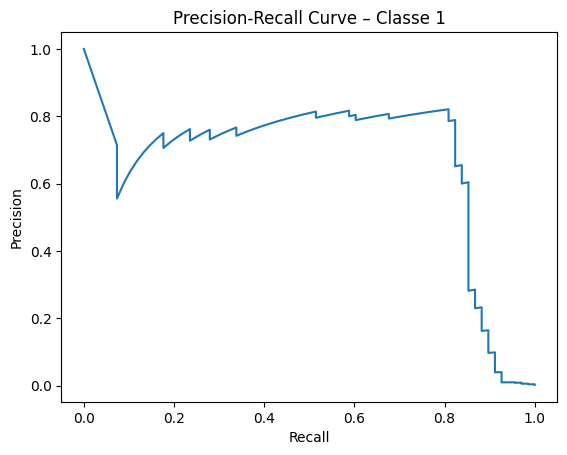

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve – Classe 1")
plt.show()

###  Avaliação de múltiplos thresholds

---



In [ ]:
thresholds_eval = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds_eval:
    y_pred_thresh = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()

    recall_pos = tp / (tp + fn)
    precision_pos = tp / (tp + fp) if (tp + fp) > 0 else 0

    results.append({
        "threshold": t,
        "recall_classe_1": recall_pos,
        "precision_classe_1": precision_pos,
        "false_negatives": fn,
        "false_positives": fp
    })

### Resultados comparativos

---



In [ ]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df

,threshold,recall_classe_1,precision_classe_1,false_negatives,false_positives
0,0.10,0.955882,0.008781,3,7337
1,0.15,0.926471,0.014257,5,4356
2,0.20,0.926471,0.021106,5,2922
3,0.25,0.926471,0.029234,5,2092
4,0.30,0.926471,0.037212,5,1630
5,0.35,0.911765,0.044669,6,1326
6,0.40,0.911765,0.054007,6,1086
7,0.45,0.911765,0.063852,6,909
8,0.50,0.911765,0.074970,6,765
9,0.55,0.911765,0.084699,6,670


### Escolha do threshold ótimo

---



In [ ]:
best_threshold = results_df.sort_values(
    by="recall_classe_1", ascending=False
).iloc[0]["threshold"]

print(f"Threshold escolhido: {best_threshold}")

Threshold escolhido: 0.1


### Avaliação final com threshold otimizado

---



In [ ]:
y_pred_final = (y_proba >= best_threshold).astype(int)

print("Matriz de Confusão Final:\n")
print(confusion_matrix(y_test, y_pred_final))

print("\nClassification Report Final:\n")
print(classification_report(y_test, y_pred_final))

Matriz de Confusão Final:

[[28625  7337]
 [    3    65]]

Classification Report Final:

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89     35962
         1.0       0.01      0.96      0.02        68

    accuracy                           0.80     36030
   macro avg       0.50      0.88      0.45     36030
weighted avg       1.00      0.80      0.88     36030



In [ ]:
joblib.dump(pipeline, "modelo_final_threshold_otimizado.joblib")

print("Modelo final salvo com sucesso.")